In [80]:
from pylab import *
from astropy import units as u
from astropy.coordinates import SkyCoord, Angle
%matplotlib notebook

In [2]:
class Coord(object):
    def __init__(self, ra, dec, raerr, decerr, unit=(u.hourangle, u.deg), errunit=u.arcsec, ra_sec=False):
        self.s = SkyCoord(ra, dec, unit=unit)
        if ra_sec:
            self.raerr = Angle(raerr*15.*np.cos(self.s.dec.rad), errunit)
        else:
            self.raerr = Angle(raerr, errunit)
            
        self.decerr = Angle(decerr, errunit)
        #self.serr = SkyCoord(raerr, decerr*u.arcsec, unit=())
        
    def separation(self, other):
        return self.s.separation(other.s)
    
    def __str__(self):
        return '{} +- {} {}+- {}'.format(self.s.ra, self.raerr, self.s.dec, self.decerr)
    __repr__ = __str__

In [16]:
# adams position from the ticket https://jira.csiro.au/browse/CRAFT-233
frb = Coord('21:44:25.271','-40:53:59.81', 0.014, 0.14, ra_sec=True)
adam_sources = {'2144-4137':Coord('21:44:04.676', '-41:37:50.86', 0.011, 0.12, ra_sec=True),
               '2144-4126':Coord('21:44:21.268','-41:26:40.21', 0.030, 0.33, ra_sec=True),
               '2144-4118':Coord('21:44:38.95', '-41:18:33.8', 0.14, 1.3, ra_sec=True),
               '2146-4051':Coord('21:46:45.62', '-40:51:28.8', 0.12, 1.4, ra_sec=True)}
vlbi_sources = {'2144-4137':Coord('21:44:04.718', '-41:37:51.103', 0.01*u.arcsec, 0.010*u.arcsec)}

# from the ATCA calogue
catalogue_sources = {
    '2106-413':Coord('21:09:33.189','-41:10:20.60',0.02,0.02), # 0.02 arcsec
    '2211-388':Coord('22:14:38.569',' -38:35:45.00',0.02,0.02),
    '2054-377':Coord('20:57:41.603454',' -37:34:02.989870',0.002,0.002), # vla calibrator
    '2052-474':Coord('20:56:16.35982597', '-47:14:47.6278751', 0.001, 0.001) # VLBI ICRF Ext2
}



In [18]:
liz_pos = '''
#name ra dec ra_err dec_err S S_err maj min pa (deconvolved)
2211-388_p 22:14:38.569 -38:35:44.998 0.00035 0.00040 1.317 2.5927E-04 0 0 0
2211-388_g 22:14:38.569 -38:35:44.998 0.00035 0.00039 1.317 5.2343E-04 0.113 0.032 -67.8
2052-474_p 20:56:16.361 -47:14:47.505 0.00446 0.00627 1.696 5.1786E-03 0 0 0
2052-474_g 20:56:16.361 -47:14:47.508 0.00424 0.00618 1.771 1.0213E-02 1.182 0.580 -0.2
2054-377_p 20:57:41.605 -37:34:02.861 0.00278 0.00550 0.4788 1.0060E-03 0 0 0
2054-377_g 20:57:41.605 -37:34:02.861 0.00279 0.00552 0.4831 2.0416E-03 0.649 0.236 -12.0
2106-413_p 21:09:33.193 -41:10:20.584 0.00332 0.00522 1.065 2.4512E-03 0 0 0
2106-413_g 21:09:33.193 -41:10:20.584 0.00333 0.00519 1.080 4.9592E-03 0.579 0.384 -39.9
2144-4126_p 21:44:21.335 -41:26:40.641 0.00479 0.00647 0.1002 3.1234E-04
2144-4126_g 21:44:21.335 -41:26:40.642 0.00484 0.00651 0.1019 6.4138E-04 0.612 0.498 -14.2
'''

liz_pos2 = '''
# 2211 as calibrator?
#name ra dec ra_err dec_err S S_err maj min pa (deconvolved)
2211-388_p 22:14:38.569 -38:35:44.998 0.00035 0.00040 1.317 2.5927E-04 0 0 0
2211-388_g 22:14:38.569 -38:35:44.998 0.00035 0.00039 1.317 5.2343E-04 0.113 0.032 -67.8
2052-474_p 20:56:16.361 -47:14:47.505 0.00446 0.00627 1.696 5.1786E-03 0 0 0
2052-474_g 20:56:16.361 -47:14:47.508 0.00424 0.00618 1.771 1.0213E-02 1.182 0.580 -0.2
2054-377_p 20:57:41.605 -37:34:02.861 0.00278 0.00550 0.4788 1.0060E-03 0 0 0
2054-377_g 20:57:41.605 -37:34:02.861 0.00279 0.00552 0.4831 2.0416E-03 0.649 0.236 -12.0
2106-413_p 21:09:33.193 -41:10:20.584 0.00332 0.00522 1.065 2.4512E-03 0 0 0
2106-413_g 21:09:33.193 -41:10:20.584 0.00333 0.00519 1.080 4.9592E-03 0.579 0.384 -39.9
2144-4126_p 21:44:21.335 -41:26:40.641 0.00479 0.00647 0.1002 3.1234E-04 0 0 0
2144-4126_g 21:44:21.335 -41:26:40.642 0.00484 0.00651 0.1019 6.4138E-04 0.612 0.498 -14.2
2144-4118_p 21:44:38.890 -41:18:34.150 0.017 0.022 2.0997E-02 2.2870E-04 0 0 0
2144-4118_g 21:44:38.882 -41:18:34.212 0.018 0.018 2.7499E-02 4.4112E-04 2.975 1.336 60.9
2144-4137_p 21:44:04.720 -41:37:50.992 0.00289 0.00374 0.5807 1.0651E-03 0 0 0
2144-4137_g 21:44:04.720 -41:37:50.992 0.00288 0.00375 0.5876 2.1592E-03 0.556 0.372 1.4
2146-4051_p 21:46:45.645 -40:51:28.583 0.027 0.038 2.0334E-02 3.6309E-04 0 0 0
2146-4051_g 21:46:45.712 -40:51:28.097 0.027 0.024 3.5551E-02 6.4341E-04 5.369 0.872 55.9
2147-4023_p? 21:47:30.469 -40:23:42.092 0.112 0.172 1.0491E-02 8.1681E-04 0 0 0
2147-4023_g? 21:47:30.193 -40:23:40.246 0.174 0.127 0.1100 4.6180E-03 15.478 9.264 -69.0
'''

# from email now has 2106 as calibrator
liz_pos3 = '''
#name ra dec raerr decerr S Serr
2106-413 21:09:33.189 -41:10:20.604 0.00189 0.00204 1.077 7.3788E-04
2052-474 20:56:16.353 -47:14:47.527 0.00741 0.00709 1.732 4.7022E-03
2054-377 20:57:41.603 -37:34:02.901 0.00604 0.00746 0.4790 1.0984E-03
2211-388 22:14:38.563 -38:35:44.924 0.018 0.012 1.274 6.0728E-03
#2144-4118 21:44:38.880 -41:18:34.137 0.019 0.020 2.1890E-02 2.2739E-04
2144-4126 21:44:21.332 -41:26:40.591 0.00970 0.01100 9.8700E-02 5.6048E-04
2144-4137 21:44:04.716 -41:37:50.949 0.00449 0.00463 0.5738 1.4088E-03
#2146-4051 21:46:45.669 -40:51:28.322 0.032 0.032 2.1661E-02 3.6903E-04
#2147-4023 21:47:30.432 -40:23:42.197 0.135 0.149 1.1525E-02 8.7879E-04
'''

liz_pos4 = '''
#using 2052 as cal
#name ra dec raerr decerr S Serr
2052-474 20:56:16.359 -47:14:47.622 0.00169   0.00175 1.710 1.6637E-03
2106-413 21:09:33.192 -41:10:20.719 0.00350   0.00419 1.078  z.2341E-03
2054-377 20:57:41.602 -37:34:03.027 0.00402   0.00549 0.4817  1.1845E-03
2211-388 22:14:38.567 -38:35:45.070 0.00830   0.00736 1.302  5.0626E-03
2144-4118 21:44:38.881 -41:18:34.276 0.019     0.020  2.2300E-02 2.3056E-04
2144-4126 21:44:21.334 -41:26:40.719 0.00616   0.00710   0.1008 3.6669E-04
2144-4137 21:44:04.718  -41:37:51.070 0.00474   0.00494 0.5816  1.5226E-03
2146-4051  21:46:45.664  -40:51:28.469  0.031     0.031 2.2264E-02 3.6630E-04
2147-4023 21:47:30.444  -40:23:42.356   0.134     0.149  1.1256E-02 8.5870E-04
'''

# calibrated on 2211-388
# I'm using the RA error where it says 'great circle distance'
shivani_pos = '''
2211-388 22:14:38.569303 0.001415 -038:35:45.000207 0.002532 
2106-413 21:09:33.19616  0.00453 -041:10:20.58204  0.01029 
2052-474 20:56:16.36242 0.01422 -047:14:47.52153 0.03418 
2054-377 20:57:41.60788 0.00405 -037:34:02.85721  0.01529 
2144-4137 21:44:04.70690 0.01212 -041:37:50.93823  0.02420 
2144-4126 21:44:21.33821  0.01127 -041:26:40.58393  0.02255 
'''
shivani_sources = {}
for line in shivani_pos.strip().split('\n'):
    bits = line.split()
    name, ra, raerr, dec, decerr = bits
    raerr, decerr = map(float, (raerr, decerr))
    shivani_sources[name] = Coord(ra, dec, raerr, decerr)
    

In [54]:
liz_sources = {}
for line in liz_pos2.split('\n'):
    if line.startswith('#') or line.strip() == '':
        continue
   
    bits = line.split()
    if '_' in bits[0]:
        name, pointgauss = bits[0].split('_')
        if pointgauss == 'p':
            continue
    else:
        name = bits[0]
    ra, dec = bits[1:3]
    raerr, decerr = map(float, bits[3:5])
    print ra, dec, raerr, decerr
    liz_sources[name] = Coord(ra, dec, raerr, decerr)
        

22:14:38.569 -38:35:44.998 0.00035 0.00039
20:56:16.361 -47:14:47.508 0.00424 0.00618
20:57:41.605 -37:34:02.861 0.00279 0.00552
21:09:33.193 -41:10:20.584 0.00333 0.00519
21:44:21.335 -41:26:40.642 0.00484 0.00651
21:44:38.882 -41:18:34.212 0.018 0.018
21:44:04.720 -41:37:50.992 0.00288 0.00375
21:46:45.712 -40:51:28.097 0.027 0.024
21:47:30.469 -40:23:42.092 0.112 0.172
21:47:30.193 -40:23:40.246 0.174 0.127


In [55]:
liz_sources['2144-4126'].separation(adam_sources['2144-4126'])

<Angle 0.00024123 deg>

In [81]:
def plot_sep(sources, ref_sources, ax=None, **kwargs):
    if ax is None:
        ax = gca()

    offsets = []
    errs = []
        
    for source, c in ref_sources.iteritems():
        if source not in sources.keys():
            continue
        other = sources[source]
        dec = c.s.dec
        dra = (other.s.ra - c.s.ra).to(u.mas)*np.cos(dec.rad)
        ddec =  (other.s.dec - c.s.dec).to(u.mas)
        raerr = np.sqrt(other.raerr**2 + c.raerr**2).to(u.mas)
        decerr = np.sqrt(other.decerr**2 + c.decerr**2).to(u.mas)
        #raerr = c.raerr.to(u.mas)
        #decerr = c.decerr.to(u.mas)
        print source, c.separation(other).to(u.mas), dra ,ddec, raerr, decerr, other.raerr.to(u.mas), other.decerr.to(u.mas)
        offsets.append((dra.value, ddec.value))
        errs.append((raerr.value, decerr.value))
        ax.errorbar(dra.value, ddec.value, xerr=raerr.value, yerr=decerr.value, **kwargs)
        ax.text(dra.mas, ddec.mas,source )


    offsets = np.array(offsets)
    errs = np.array(errs)
    weights = 1./errs**2
    avgoff = np.average(offsets, weights=weights, axis=0)
    # errror in a weighted mean
    err_mean = np.sqrt(np.average((offsets - avgoff)**2, weights=weights, axis=0))
    offset_std = offsets.std(axis=0)
    print 'Average Offset ra={:0.1f} +- {:0.1f} mas dec={:0.1f}+- {:0.1f}mas sigmas ra={:0.1f} mas dec={:0.1f} mas'.format(avgoff[0], err_mean[0], avgoff[1], err_mean[1], offset_std[0], offset_std[1])
    ax.set_xlabel('R.A. Offset (mas)')
    ax.set_ylabel('Dec Offset (mas)')
    return avgoff, offset_std

<IPython.core.display.Javascript object>


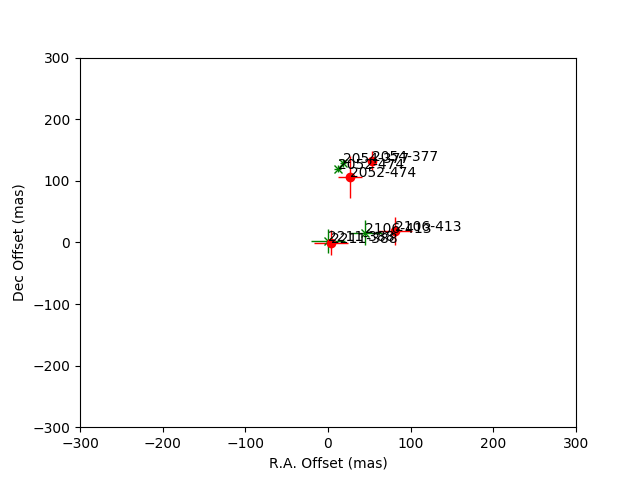

---- LIZ ----
2106-413 47.9143mas 45.1639mas 16mas 20.275327371 mas 20.6624320931 mas 3.33mas 5.19mas
2054-377 130.174mas 18.3812mas 128.87mas 3.43279769284 mas 5.87114980221 mas 2.79mas 5.52mas
2052-474 120.47mas 11.9548mas 119.875mas 4.35632872956 mas 6.26038337484 mas 4.24mas 6.18mas
2211-388 2mas 0mas 2mas 20.0030622656 mas 20.0038021386 mas 0.35mas 0.39mas
Average Offset ra=16.1 +- 5.3 mas dec=115.2+- 32.1mas sigmas ra=16.5 mas dec=58.0 mas
---- SHIVANI ----
2106-413 82.8144mas 80.8434mas 17.96mas 20.5066062526 mas 22.4918674191 mas 4.53mas 10.29mas
2054-377 142.716mas 52.6231mas 132.66mas 4.51691266243 mas 15.4202496737 mas 4.05mas 15.29mas
2052-474 109.576mas 26.4142mas 106.345mas 14.255118379 mas 34.1946253087 mas 14.22mas 34.18mas
2211-388 3.55824mas 3.55222mas -0.207mas 20.0499931421 mas 20.1596384888 mas 1.415mas 2.532mas
Average Offset ra=49.5 +- 13.5 mas dec=72.0+- 60.8mas sigmas ra=28.9 mas dec=56.5 mas


(-300, 300)

In [82]:
ax = gca()
print '---- LIZ ----'
liz_cal_off, liz_cal_err = plot_sep(liz_sources, catalogue_sources, ax, marker='x', c='green')
print '---- SHIVANI ----'
shivani_cal_off, shivani_cal_err = plot_sep(shivani_sources, catalogue_sources, ax, marker='o', c='red')
xlim(-300,300)
ylim(-300,300)

---- LIZ ----
2144-4126 868.419mas 753.345mas -432mas 337.353456623 mas 330.064206027 mas 4.84mas 6.51mas
2144-4137 510.666mas 493.311mas -132mas 123.361411927 mas 120.058579452 mas 2.88mas 3.75mas
2144-4118 869.927mas -766.179mas -412mas 1577.53023442 mas 1300.12460941 mas 18mas 18mas
2146-4051 1258.41mas 1043.74mas 703mas 1361.66750185 mas 1400.20569917 mas 27mas 24mas
Average Offset ra=520.8 +- 133.2 mas dec=-163.3+- 120.2mas sigmas ra=690.4 mas dec=460.8 mas
--- SHIVANI ---
2144-4126 873.519mas 789.438mas -373.93mas 337.506951033 mas 330.769561024 mas 11.27mas 22.55mas
2144-4137 355.162mas 346.439mas -78.23mas 123.921902635 mas 122.415848647 mas 12.12mas 24.2mas
Average Offset ra=399.1 +- 143.3 mas dec=-113.9+- 96.3mas sigmas ra=221.5 mas dec=147.9 mas


(-1000, 500)

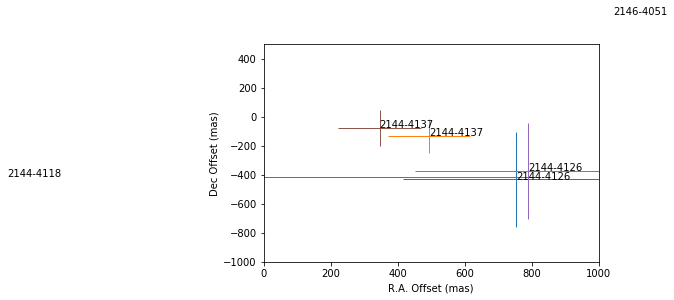

In [67]:
ax = gca()
print '---- LIZ ----'
liz_frb_off, liz_frb_err = plot_sep(liz_sources, adam_sources, ax)
print '--- SHIVANI ---'
shivani_frb_off, shivani_frb_err = plot_sep(shivani_sources, adam_sources, ax)
xlim(0, 1000)
ylim(-1000, 500)

2144-4126 873.519mas 789.438mas -373.93mas 337.506951033 mas 330.769561024 mas 11.27mas 22.55mas
2144-4137 355.162mas 346.439mas -78.23mas 123.921902635 mas 122.415848647 mas 12.12mas 24.2mas
Average Offset ra=399.1 +- 143.3 mas dec=-113.9+- 96.3mas sigmas ra=221.5 mas dec=147.9 mas


Text(0.5,1,'Shivani')

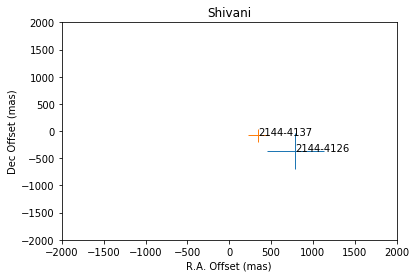

In [53]:
plot_sep(shivani_sources, adam_sources)
xlim(-2000, 2000)
ylim(-2000, 2000)
gca().set_title('Shivani')

(21.781574222222226, 21.73239688888889)

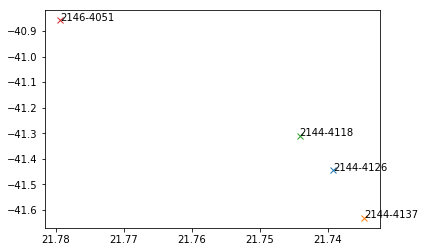

In [48]:
for s, c in adam_sources.iteritems():
    plot(c.s.ra.hourangle, c.s.dec.deg, 'x')
    text(c.s.ra.hourangle, c.s.dec.deg, s)
        
xlim(xlim()[-1], xlim()[0])

In [90]:
newra = frb.s.ra + (-shivani_cal_off[0] + shivani_frb_off[0])*u.mas
newdec = frb.s.dec  + (-shivani_cal_off[1] + shivani_frb_off[1])*u.mas
raerr = np.sqrt(frb.raerr.mas**2 + shivani_cal_err[0]**2 + shivani_frb_err[0]**2)
decerr = np.sqrt(frb.decerr.mas**2 + shivani_cal_err[1]**2 + shivani_frb_err[1]**2)
print newra.to(u.hourangle), newdec
print 'errors', raerr, decerr, 'mas', 'statistical', frb.raerr.mas, frb.decerr.mas
print newra.deg, newdec.deg, raerr/1000/3600., decerr/1000/3600.

21h44m25.2943s -40d53m59.9959s
errors 274.02829202004324 211.29829026125324 mas statistical 158.729355179 140.0
326.105392936 -40.8999988475 7.611897000556757e-05 5.869396951701479e-05


In [50]:
print frb.s.ra.deg, frb.s.dec.deg, frb.raerr.to(u.degree).value, frb.decerr.to(u.degree).value

326.105295833 -40.8999472222 4.40914875496e-05 3.88888888889e-05


In [69]:
shivani_cal_off, shivani_cal_err

(array([49.49496843, 71.99848888]), array([28.88597783, 56.45657593]))

In [83]:
shivani_frb_off

array([ 399.06608761, -113.85268816])